# PIMA Indian Diabetes
## Intro and Core Functions
**Project Link:** https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

**Latex Syntax:** https://gtribello.github.io/mathNET/assets/notebook-writing.html

Logistic regression is a classification method that uses a **probability threshold to bucket results into classes**. The most common example of this is a binary logistic regression where the output/target/**dependent variable can only take a value of 0 or 1**.

A logistic regression function is essentially a **linear regression with the sigmoid function applied to it**. For example, the linear regression function is as follows:

$$ h(\theta) = \theta _0 + \theta_1 x_1 + ... + \theta _n x_n $$

Here, each x value is an independent variable and the theta values are parameters which can be optimized to fit your linear regression. The sigmoid function is as follows:

$$ p = \frac{1}{1+e^{-y}} $$

Therefore if you substitute in your linear regression function to your sigmoid function, you end up with your logistic regression function:

$$ p = \frac{1}{1+e^{-(\theta _0 + \theta_1 x_1 + ... + \theta _n x_n)}} $$

Key characteristics of a logistic regression to bear in mind are:
* Dependent variable follows a Bernoulli distribution (e.g. single instance of a coin toss)
* The estimation method is **maxiumum likelihood estimation**. Likelihood means the probability of getting the actual results you're seeing (i.e. target variable values) given your hypothesis (i.e. your logistic regression function). This method/model will determine/estimate parameter values that give your actually observed results with the highest probability. In layman's terms it's the method used under the hood to fit your logistic regression as best possible to your data (the equivalent of the OLS method of distance/error reduction in linear regression).
* Model accuracy here is not determined using an $ r^2 $ value, instead it used concordance/KS-statistics (more later).

## Maximum Likelihood Estimator vs. Ordinary Least Squares
**Linear regression uses ordinary least squares** to fit it's parameters and regression line (by simply minimizing the square of the variance between actual and predicted values) whilst **logistic regression uses maximum likelihood estimation** (by determining the optimal parameters that give your actual observed values with the highest probability). In layman's terms, **OLS minimizes distance whilst MLE determines parameters most likely to produce observed values**.

**Both methods are used to determine parameters for the model**. OLS draws a regression line through the data with the intent of reducing the distance between the prediction line and actual data averaged across all points. Whilst MLE aims to define the mean and standard deviation of your data in order to build a distribution that gives the best likelihood of explaining your data points, this distribution can then be applied to test data in order to most accurately predict values given the same hypothesis (i.e. model function / distribution).

As an example, if your actual data was normally distributed around a mean of 0 with a standard deviation of 1, you would use MLE to determine that a mean of 0 and standard deviation of 1 are the optimum parameters that give the highest chance of explaining your actual data. This would then give you a model which predicted a normal distribution (imagine the classic normal distribution line on a chart). Then, when you came to look at test data, you could use these optimized parameters to calculate the predicted target values given the same distribution as your MLE function calculated.

Finally, OLS doesn't make any stochastic assumptions of the data (i.e. it doesn't make random predictions to test scenarios), whereas MLE assumes a joint probability mass function (i.e. the probability map when combining your multiple feature variables - for 2 variables this would be a bivariate distribution). There are a lot of technical components behind this short paragraph, but the key thing to bear in mind is that different statistical methods (e.g. OLS vs. MLE) work better in some cases rather than others and it's their assumptions which determine which data they'll work best on. In the case of binary logistic regression, our output variable can only be a 0 or a 1 and this is one factor/assumption which means that MLE is a good method for building a regression model for this data. The root of this are the statistical mechanics underneath, which will require lots of reading to fully understand, but just bear in mind for now that MLE is the method used in logistic regression because it fits best with the underlying data by definition.

**MLE explained:** https://www.youtube.com/watch?v=XepXtl9YKwc

**Joint Probability Mass Function:** https://en.wikipedia.org/wiki/Joint_probability_distribution

## The Sigmoid Function
The **sigmoid function**, also known as the **logistic function**, creates an **S-shaped curve** which can map any real-world value to a value **between 0 and 1**. If the output of the function is **$ > 0.5 $ we say that the output will be 1**, whilst if the output is **$ < 0.5 $ we say that the output will be 0**. It is not used to predict continuous outputs (e.g. like linear regression), therefore the outputs can only be either 0 or 1.

Below is an example of what the sigmoid function looks like when plotted.

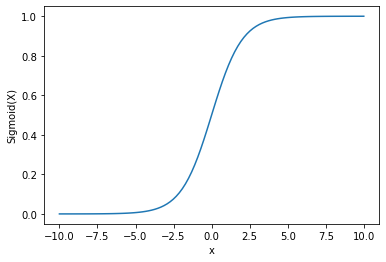

In [1]:
# load libraries
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
# define values
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 

# plot data
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

## Types of Logistic Regression
Logistic regression can be run on datasets with different target/dependent variable values. These include:
* **Binary Logistic Regression** where the output values are either 0 or 1.
* **Multinomial Logistic Regression** where you have multiple output classes (e.g. types of wine, colours, email categories).
* **Ordinal Logistic Regression** with multiple classes where order matters (e.g. 0-5 star rating for hotels).

## SKLearn Logistic Regression Classifier
**Data:** https://www.kaggle.com/uciml/pima-indians-diabetes-database

Let's load our PIMA diabetes dataset and take an initial look, the goal here is to identify whether or not someone has diabetes based on a collection of information about the individual.

In [2]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show plots in notebook
%matplotlib inline

# define column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# read in data
pima = pd.read_csv('S:/Matt/Data Science/Other/Logistic Regression/Data/pima_diabetes.csv', header=0, names=col_names)

# peek at data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Steps:
* Split data into features (independent) and labels/target (dependent).
* Split data into train and test sets.
* Build logistic regression model, fit to data and predict test classes.

In [3]:
# split into features and target
y_cols = 'label'
X_cols = [i for i in pima.columns.values.tolist() if i not in y_cols]
X = pima[X_cols]
y = pima['label']

# load libraries
from sklearn.model_selection import train_test_split

# split into train and test sets (75:25 train:test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# load libraries
from sklearn.linear_model import LogisticRegression

# build model object
logreg = LogisticRegression()

# fit to training data
logreg.fit(X_train, y_train)

# predict outcomes using test data
y_pred = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Confusion Matrix for Model Accuracy
Now that we have made our predictions by building a logistic regression model on our training data and then predicting outputs given our test data, we can **assess the accuracy of our model by comparing our predictions to the known test classes**.

**Confusion (or error) matrices** are used to quantify the **accuracy of a classification problem**. They look at how many classes were correctly predicted against known/test outputs and how many were incorrect (i.e. confused) and score the results. The confusion matrix is normally split into **true positive, false positive, true negative and false negative** with the aim being to get a high proportion of predictions falling into the true (positive or negative) category.

There are specific measures associated with confusion matrices such as **precision** ($ \frac{TP}{TP + FP} $), **recall** ($ \frac{TP}{TP + FN} $), **accuracy** ($ \frac{TP + TN}{TP + TN + FP + FN} $) and **f-measure** (essentially the mean of the precision and recall where extreme values are penalised i.e. a **harmonic mean** rather than an arithmetic mean - $ \frac{2^*recall^*precision}{recall + precision} $).

Let's run a confusion matrix to see how our model has fared. We can visualize our matrix using Seaborn.

[[115  15]
 [ 25  37]]


Text(0.5, 15.0, 'Predicted label')

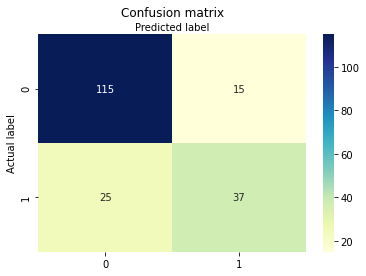

In [4]:
# load libraries
from sklearn.metrics import confusion_matrix

# build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print outputs
print(conf_matrix)

# heatmap variables
class_names = [0, 1] # possible output classes
fig, ax = plt.subplots() # create figure and axis objects
tick_marks = np.arange(len(class_names)) # define ticks to line up with classes
plt.xticks(tick_marks, class_names) # label x axis
plt.yticks(tick_marks, class_names) # label y axis

# plot heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='YlGnBu', fmt='g') # fmt = string formatting on plot
ax.xaxis.set_label_position('top') # labels along top of x axis
plt.tight_layout # tune layout
plt.title('Confusion matrix', y=1.1) # add title
plt.ylabel('Actual label') # add y title
plt.xlabel('Predicted label') # add x title

As you can see, the negative values were predicted fairly well (115/130) whereas the positive results were almost a 50:50 split which is not ideal. Let's check some of the metrics of our confusion matrix (recall, precision, accuracy) to see exactly how well it fared.

In [5]:
# load libraries
from sklearn import metrics

# show accuracy, precision, recall
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)) # order doesn't matter here, could have pred then test too
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))

Accuracy:  0.7916666666666666
Recall:  0.5967741935483871
Precision:  0.7115384615384616


As we mentioned earlier, accuracy relates to how many predictions you make which are correct overall, our score for this is 79% which isn't bad at all. Therefore, within our dataset, 80% of the time we're able to correctly predict who has diabetes from our input data using our current model.

Recall relates to how well we can classify positive results, essentially if someone has diabetes, how often do we correctly diagnose this? Our result for recall is 60% which isn't fantastic but isn't horrific either.

Finally, precision relates to how many times we correctly predict positive results compared to how many positive results there actually are (i.e. mis-diagnosis of diabetes when the patient doesn't have it). Our result here is 71% which is again in the good range.

## Receiver Operating Characteristic (ROC) Curve
ROC curve's are used to determine the optimum cut-off threshold for a multi-class prediction model and visualize the accuracy and effectiveness of your classifier. In this case, we are using a logistic regression to predict an outcome of 0 or 1, where there are only two distinct/discrete outcomes. However, the underlying function predicts a probability (continuous value) between 0 and 1 and so we must pick a threshold value to say "when our probability is above x, we predict the class to be 0". This threshold is normally 0.5 by default, but in reality you often want to pick your own value which gives you the optimum sensitivity and specificity for predicting results and ROC lets us analyse which value to pick.

**Sensitivity** is the proportion of true positives identified from all positive predictions, i.e. true positive rate. **Specificity** is the proportion of true negatives identified from all negative predictions, i.e. true positive rate. The ROC plot uses sensitivity on the y-axis and 1 - specificity (i.e. false positive rate) on the x-axis. You then plot your sensitivity and 1 - specificity results for every threshold value between 0 and 1. Your aim is to have a **high sensitivity** (i.e. chance of predicting true outcomes when the actual observation is also true) and **low 1 - specificity** (i.e. chance of predicting true outcomes when the actual observation is negative). Therefore, your ROC curve is showing you a visual representation of **how well your model correctly predicts positive and negative results for different thresholds**.

You want your ROC curve to appear towards the **top left** of your plot, where it's correctly predicting true results and has a low false positive prediction rate. If it's a straight line through the middle of the plot, your model is essentially tossing a coin and guessing right half the time and wrong half the time. If the curve is towards the bottom right of the plot, you're actively guessing incorrect values (i.e. mis-classifying) more often than not.

The area under the curve **(AUC) is used to calculate a score (between 0.5 and 1)** which tells you how good a predictor of outputs your classifier is, 0.5 would be poor whilst 1 would be a perfect classifier.

**Additional Reading:** 
* https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
* https://www.theanalysisfactor.com/what-is-an-roc-curve/

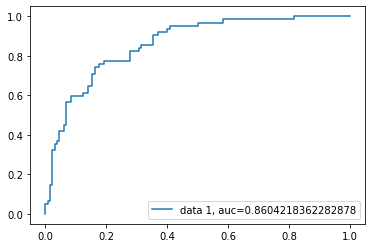

In [8]:
# make y-predictions using test data and classifier model built off training data
y_pred_prob = logreg.predict_proba(X_test)[::,1]

# compare known observations to predicted classes
# extract false and true positive rate (i.e. x and y-axes of plot)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)

# extract area under curve (i.e. score of classifier)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

# plot results
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score ranges between 0.5 and 1, therefore our score of 0.86 is pretty good and you can see that our curve is pushed up towards the top left of the plot which is what you want to see (i.e. correctly classifying positive results and not mis-classifying them as false positives).

There are pros and cons to the ROC scoring method for a logistic regression that need to be considered. Firstly, it's a very efficient scoring method meaning it doesn't take too much computational power or time. It's also easy to implement (a few lines of code above) and is widely used and understood in the data science community. It also doesn't require scaling of features which saves a few steps.

However, it doesn't work well with large numbers of categorical features and is prone to over-fitting. It requires a linear relationship between features and target(s) also, performing poorly on non-correlated data. 